# Decision Trees in Python

### Import Libraries

In [1]:
import pandas as pd
from sklearn import tree

### Get The Data. Load data "spambase_data.csv"

In [3]:
df = pd.read_csv('spambase_data.csv',header = None)
df.head() # used to display top 5 rows

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Train and Test Split

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[df.columns[:-1]]
Y = df[len(df.columns)-1]


#### Obtain X_train, X_test, Y_train, Y_test by splitting the dataset into 70-30 ratio with a random state value 30.

Note: random_state is used to control the shuffling in the split of the dataset.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)

### Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
predictions_gini = dtree.predict(X_test)

In [13]:
print(classification_report(Y_test,predictions_gini))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions_gini))
print("\n Accuracy")
print(accuracy_score(Y_test,predictions_gini))


              precision    recall  f1-score   support

           0       0.92      0.95      0.93       863
           1       0.91      0.86      0.88       518

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.92      0.91      1381

Confusion Matrix
[[816  47]
 [ 70 448]]

 Accuracy
0.9152787834902245


### Tree Visualization 

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=1024)
tree.plot_tree(dtree)
#fig.savefig('decision_tree.png')

[Text(8331.23443328551, 12149.028571428571, 'X[51] <= 0.083\ngini = 0.481\nsamples = 3220\nvalue = [1925, 1295]'),
 Text(6236.5061692969875, 11707.245714285715, 'X[6] <= 0.045\ngini = 0.263\nsamples = 1833\nvalue = [1548, 285]'),
 Text(5477.490961262554, 11265.462857142857, 'X[52] <= 0.164\ngini = 0.177\nsamples = 1695\nvalue = [1529, 166]'),
 Text(4724.595695839312, 10823.68, 'X[15] <= 0.115\ngini = 0.139\nsamples = 1632\nvalue = [1509, 123]'),
 Text(4202.550358680058, 10381.897142857142, 'X[22] <= 0.115\ngini = 0.098\nsamples = 1483\nvalue = [1406, 77]'),
 Text(3704.9847919655667, 9940.114285714286, 'X[54] <= 9.377\ngini = 0.084\nsamples = 1451\nvalue = [1387, 64]'),
 Text(3147.0737446197995, 9498.33142857143, 'X[10] <= 0.285\ngini = 0.073\nsamples = 1428\nvalue = [1374, 54]'),
 Text(2468.471736011478, 9056.548571428571, 'X[55] <= 12.5\ngini = 0.066\nsamples = 1403\nvalue = [1355, 48]'),
 Text(1785.3153515064564, 8614.765714285713, 'X[7] <= 0.835\ngini = 0.03\nsamples = 922\nvalue = 

#### Q1: Create a decision stump and find the majority class in the dataset

In [16]:
#### Code here ####
dtree3 = DecisionTreeClassifier(max_depth =1 )
dtree3.fit(X_train,Y_train)
#tree.plot_tree(dtree3)

DecisionTreeClassifier(max_depth=1)

In [18]:
#### Majority class ####
import collections
predictions = dtree3.predict(X_train)
a = collections.Counter(predictions)
print(a)
# taking list of values in v 
v = list(a.values()) 
  
# taking list keys in k
k = list(a.keys()) 
  
print("majoity class",k[v.index(max(v))]) 

Counter({0: 1833, 1: 1387})
majoity class 0


#### Q2: Implement the decision tree classifier using entropy to measure the quality of split and random state value as 30. 
Note: The features are always randomly permuted at each split, the best found split may vary across different runs. To obtain a deterministic behaviour during fitting, random state has to be fixed to an integer.

In [24]:
#### Code here ####
dtree1 = DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='best')
dtree1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=30)

In [25]:
predictions_entropy4 = dtree1.predict(X_test)

In [26]:
print(classification_report(Y_test,predictions_entropy4))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions_entropy4))
print("Accuracy")
print(accuracy_score(Y_test,predictions_entropy4))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

Confusion Matrix
[[814  49]
 [ 75 443]]
Accuracy
0.9102099927588704


#### Q3: Compare the two trees on the basis of their accuracy. Which tree gives better accuarcy (using gini index or entropy).

In [27]:
print(" Accuracy for gini")
print(accuracy_score(Y_test,predictions_gini))

 Accuracy for gini
0.9152787834902245


In [28]:
print("Accuracy using entropy")
print(accuracy_score(Y_test,predictions_entropy))

Accuracy using entropy
0.9131064446053584


#### Q4: Fully grown decision trees models usually overfits the data. To overcome the problem of overfitting, pruning techniques are used. One of which is restricting the height of the tree. Find the value of the height for which the decision tree model is giving the highest accuracy. (Use entropy measure)

Height for maximum accuracy 17


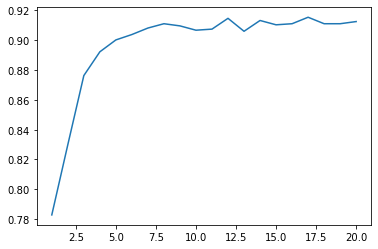

In [29]:
#### Code here ####
import matplotlib.pyplot as plt
import numpy as np
max_d = dtree1.tree_.max_depth
acc = []
for i in range(1,max_d+1):
    dtree4 = DecisionTreeClassifier(max_depth = i,criterion='entropy')
    dtree4.fit(X_train,Y_train)
    predictions_entropy = dtree4.predict(X_test)
    acc.append(accuracy_score(Y_test,predictions_entropy))
print("Height for maximum accuracy",np.argmax(acc)+1)
plt.plot(np.arange(1,max_d+1),acc)
plt.show()

In [30]:
acc

[0.782766111513396,
 0.8298334540188269,
 0.8761766835626358,
 0.8921071687183201,
 0.9000724112961622,
 0.9036929761042722,
 0.9080376538740044,
 0.9109341057204924,
 0.9094858797972484,
 0.9065894279507604,
 0.9073135409123824,
 0.9145546705286025,
 0.9058653149891384,
 0.9131064446053584,
 0.9102099927588704,
 0.9109341057204924,
 0.9152787834902245,
 0.9109341057204924,
 0.9109341057204924,
 0.9123823316437364]

#### Q5: Find the feature importance from the trained model and rebuild the model using top 10 important features only.


In [31]:
#### Code here ####
imp_feature= dtree1.feature_importances_
print(imp_feature)

[0.00000000e+00 8.25383955e-03 6.09375850e-03 0.00000000e+00
 2.04061434e-02 2.03436399e-03 1.13583734e-01 6.38747065e-03
 1.45722282e-03 2.03401402e-03 6.79777397e-03 1.28815992e-02
 1.32321407e-03 7.48170650e-03 0.00000000e+00 6.16259491e-02
 9.07155743e-03 4.08093216e-03 2.71879515e-02 0.00000000e+00
 1.38685225e-02 1.91694293e-03 7.27558185e-03 2.90822009e-03
 6.49757565e-02 1.56383980e-03 2.71695092e-02 0.00000000e+00
 1.15378904e-03 6.84578119e-04 0.00000000e+00 0.00000000e+00
 1.80138096e-03 0.00000000e+00 0.00000000e+00 1.98758011e-03
 8.01344948e-03 0.00000000e+00 0.00000000e+00 1.15378904e-03
 3.08410322e-03 2.41292985e-04 0.00000000e+00 1.87081119e-03
 1.32934971e-02 1.48772567e-02 0.00000000e+00 0.00000000e+00
 4.56366919e-03 5.24857317e-03 0.00000000e+00 2.88182500e-01
 6.40947453e-02 5.49961957e-03 3.31742714e-02 1.22209956e-01
 1.84855341e-02]


In [33]:
import heapq
top10 = []
for index in range(len(imp_feature)):
    heapq.heappush(top10,(imp_feature[index],index))
top10 = heapq.nlargest(10,top10)
id = []
for index in range(len(top10)):
    id.append(heapq.heappop(top10)[1])
print(id)
df1 = df.copy(deep = True)
for col in df.columns:
    if col not in id:
        df1.drop(col, axis=1,inplace = True)

[51, 4, 26, 18, 54, 15, 52, 24, 6, 55]


In [34]:
X = df1[df1.columns[:-1]]
Y = df[len(df.columns)-1]
dtree = DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='best')
dtree.fit(X_train,Y_train)
pred = dtree.predict(X_test)

print('classification report')
print(classification_report(Y_test,pred))
print('confusion matrix')
print(confusion_matrix(Y_test,pred))
print("accuracy")
print(accuracy_score(Y_test,pred))

classification report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       863
           1       0.90      0.86      0.88       518

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381

confusion matrix
[[814  49]
 [ 75 443]]
accuracy
0.9102099927588704


#### Q6: Is there any information loss in the tree created above# 

yes reducation in accuracy is evident

 #### Q7: Create 5 different random vectors of size 10 each to select the attributes from the dataset. Create 5 decision trees using the selected set of attributes in each case and calculate their accuracy#

In [39]:

import numpy as np
for i in range(5):
    x = np.random.choice(np.arange(1,57),10,replace=False)
    print(x)
    X = df[df.columns[x]]
    Y = df[len(df.columns)-1]
    print(X.head())
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 30)
    dtree = DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='best')
    dtree.fit(X_train,Y_train)
    predictions = dtree.predict(X_test)
    print(classification_report(Y_test,predictions))
    print('confusion matrix')
    print(confusion_matrix(Y_test,predictions))
    print("accuracy")
    print(accuracy_score(Y_test,predictions))

[44 24 48 42  1 47 31  2 15 25]
     44   24    48    42    1    47   31    2     15   25
0  0.00  0.0  0.00  0.00  0.64  0.0  0.0  0.64  0.32  0.0
1  0.00  0.0  0.00  0.00  0.28  0.0  0.0  0.50  0.14  0.0
2  0.06  0.0  0.01  0.12  0.00  0.0  0.0  0.71  0.06  0.0
3  0.00  0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.31  0.0
4  0.00  0.0  0.00  0.00  0.00  0.0  0.0  0.00  0.31  0.0
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       863
           1       0.79      0.67      0.73       518

    accuracy                           0.81      1381
   macro avg       0.81      0.78      0.79      1381
weighted avg       0.81      0.81      0.81      1381

confusion matrix
[[773  90]
 [169 349]]
accuracy
0.8124547429398986
[ 1 40 18 50  2 43 56 10 49 16]
     1    40    18   50    2    43    56    10     49    16
0  0.64  0.0  1.93  0.0  0.64  0.0   278  0.00  0.000  0.00
1  0.28  0.0  3.47  0.0  0.50  0.0  1028  0.21  0.132  0.07
2  0.00  0.0 

#### Q8: Is there any decision tree you will discard and why?

No since at least 50 percent accuracy is there

##### Q9: Load data "spambase_data_2.csv". Create a decision tree using entropy. Perform its evaluation. 

In [129]:
df = pd.read_csv('spambase_data_2.csv',header = None)
dtreez = DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='best')
dtreez.fit(X_train,Y_train)

predictions_entropy = dtreez.predict(X_test)

print(classification_report(Y_test,predictions_entropy))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions_entropy))
print("Accuracy")
print(accuracy_score(Y_test,predictions_entropy))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       863
           1       0.80      0.75      0.78       518

    accuracy                           0.84      1381
   macro avg       0.83      0.82      0.82      1381
weighted avg       0.84      0.84      0.84      1381

Confusion Matrix
[[768  95]
 [130 388]]
Accuracy
0.837074583635047


#### Q10. Perform pre- pruning by restricting the height of tree and find the height at which you get highest accuracy.# #### Q10. Perform pre- pruning by restricting the height of tree and find the height at which you get highest accuracy.

Height for maximum accuracy 6


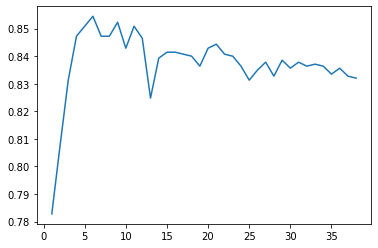

In [128]:
import matplotlib.pyplot as plt
import numpy as np
max_d = dtreez.tree_.max_depth
acc = []
for i in range(1,max_d+1):
    dtree5 = DecisionTreeClassifier(max_depth = i,criterion='entropy')
    dtree5.fit(X_train,Y_train)
    predictions_entropy = dtree5.predict(X_test)
    acc.append(accuracy_score(Y_test,predictions_entropy))
print("Height for maximum accuracy",np.argmax(acc)+1)
plt.plot(np.arange(1,max_d+1),acc)
plt.show()

In [133]:
#prepruned by max depth for best tree 
df = pd.read_csv('spambase_data_2.csv',header = None)
dtreez = DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='best',max_depth=np.argmax(acc)+1)
dtreez.fit(X_train,Y_train)

predictions_entropy10 = dtreez.predict(X_test)

print(classification_report(Y_test,predictions_entropy10))
print("Confusion Matrix")
print(confusion_matrix(Y_test,predictions_entropy10))
print("Accuracy")
print(accuracy_score(Y_test,predictions_entropy10))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       863
           1       0.87      0.71      0.79       518

    accuracy                           0.85      1381
   macro avg       0.86      0.83      0.84      1381
weighted avg       0.86      0.85      0.85      1381

Confusion Matrix
[[810  53]
 [148 370]]
Accuracy
0.8544532947139754


#### Q11: Is there any difference between precision and accuracy you get in Q4 and Q10.

In [134]:
print("accurace of q4 - accuracy of q10",accuracy_score(Y_test,predictions_entropy10)-accuracy_score(Y_test,predictions_entropy4))

accurace of q4 - accuracy of q10 -0.055756698044895026
